In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,roc_auc_score,r2_score,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor
plt.rcParams['figure.figsize']=[15,8]
import statsmodels.api as sm
from statsmodels.api import add_constant

In [141]:
df=pd.read_csv('car_sales.csv',index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [142]:
#Target variable - Price

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min.Price,93.0,17.125806,8.746029,6.7,10.8,14.7,20.3,45.4
Price,93.0,19.509677,9.659430,7.4,12.2,17.7,23.3,61.9
Max.Price,93.0,21.898925,11.030457,7.9,14.7,19.6,25.3,80.0
MPG.city,93.0,22.365591,5.619812,15.0,18.0,21.0,25.0,46.0
MPG.highway,93.0,29.086022,5.331726,20.0,26.0,28.0,31.0,50.0
EngineSize,93.0,2.667742,1.037363,1.0,1.8,2.4,3.3,5.7
Horsepower,93.0,143.827957,52.374410,55.0,103.0,140.0,170.0,300.0
RPM,93.0,5280.645161,596.731690,3800.0,4800.0,5200.0,5750.0,6500.0
Rev.per.mile,93.0,2332.204301,496.506525,1320.0,1985.0,2340.0,2565.0,3755.0
Fuel.tank.capacity,93.0,16.664516,3.279370,9.2,14.5,16.4,18.8,27.0


In [144]:
df.cov().T

,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
Min.Price,76.493022,81.998008,87.477202,-30.614972,-27.044635,5.856385,367.574053,-222.321178,-2042.671634,18.223317,0.556452,70.734888,30.822055,16.290182,12.082644,9.555611,11.059771,3438.918829
Price,81.998008,93.304579,104.585337,-32.275316,-28.875842,5.986403,398.764727,-28.560659,-2044.978086,19.623173,0.580680,71.037132,32.994004,16.646318,12.223247,8.812643,10.944896,3687.667251
Max.Price,87.477202,104.585337,121.670977,-33.958298,-30.732515,6.121921,430.075900,164.652875,-2048.416082,21.027135,0.609876,71.343700,35.167333,17.024322,12.365171,8.053767,10.820280,3937.552069
MPG.city,-30.614972,-32.275316,-33.958298,31.582281,28.283427,-4.139165,-197.979897,1217.478962,1941.631019,-14.985799,-2.433964,-54.673329,-25.567087,-15.302127,-12.071061,-6.461172,-8.299157,-2795.094670
MPG.highway,-27.044635,-28.875842,-30.732515,28.283427,28.427302,-3.466760,-172.865475,997.335203,1555.243104,-13.743654,-2.583567,-42.267765,-22.375760,-12.902291,-10.202782,-5.869719,-5.582957,-2549.654628
EngineSize,5.856385,5.986403,6.121921,-4.139165,-3.466760,1.076122,39.776999,-339.163745,-424.411816,2.583082,0.401718,11.819705,5.181942,3.399229,2.602945,1.485183,2.049398,517.132714
Horsepower,367.574053,398.764727,430.075900,-197.979897,-172.865475,39.776999,2743.078775,1146.633941,-15610.703600,122.253612,0.504091,421.296400,173.892824,127.543712,94.742520,37.492186,54.982234,22825.504909
RPM,-222.321178,-28.560659,164.652875,1217.478962,997.335203,-339.163745,1146.633941,356088.709677,146589.323282,-652.324684,-289.621318,-3844.915849,-1903.769285,-1217.093268,-972.580645,-602.054335,-918.488407,-150636.132539
Rev.per.mile,-2042.671634,-2044.978086,-2048.416082,1941.631019,1555.243104,-424.411816,-15610.703600,146589.323282,246518.729547,-992.747020,-172.800374,-5004.313932,-2156.293245,-1464.371201,-1173.328074,-555.798230,-883.755646,-215349.675666
Fuel.tank.capacity,18.223317,19.623173,21.027135,-14.985799,-13.743654,2.583082,122.253612,-652.324684,-992.747020,10.754271,1.608520,33.063850,16.944811,9.898282,7.096283,4.992930,5.536058,1729.468268


In [160]:
num1=df.select_dtypes(include=np.number)
cat1=df.select_dtypes(include='object')


In [161]:
print(num1.shape)
print(cat1.shape)

(93, 18)
(93, 9)


In [168]:
num2=num1.drop('Price',axis=1)

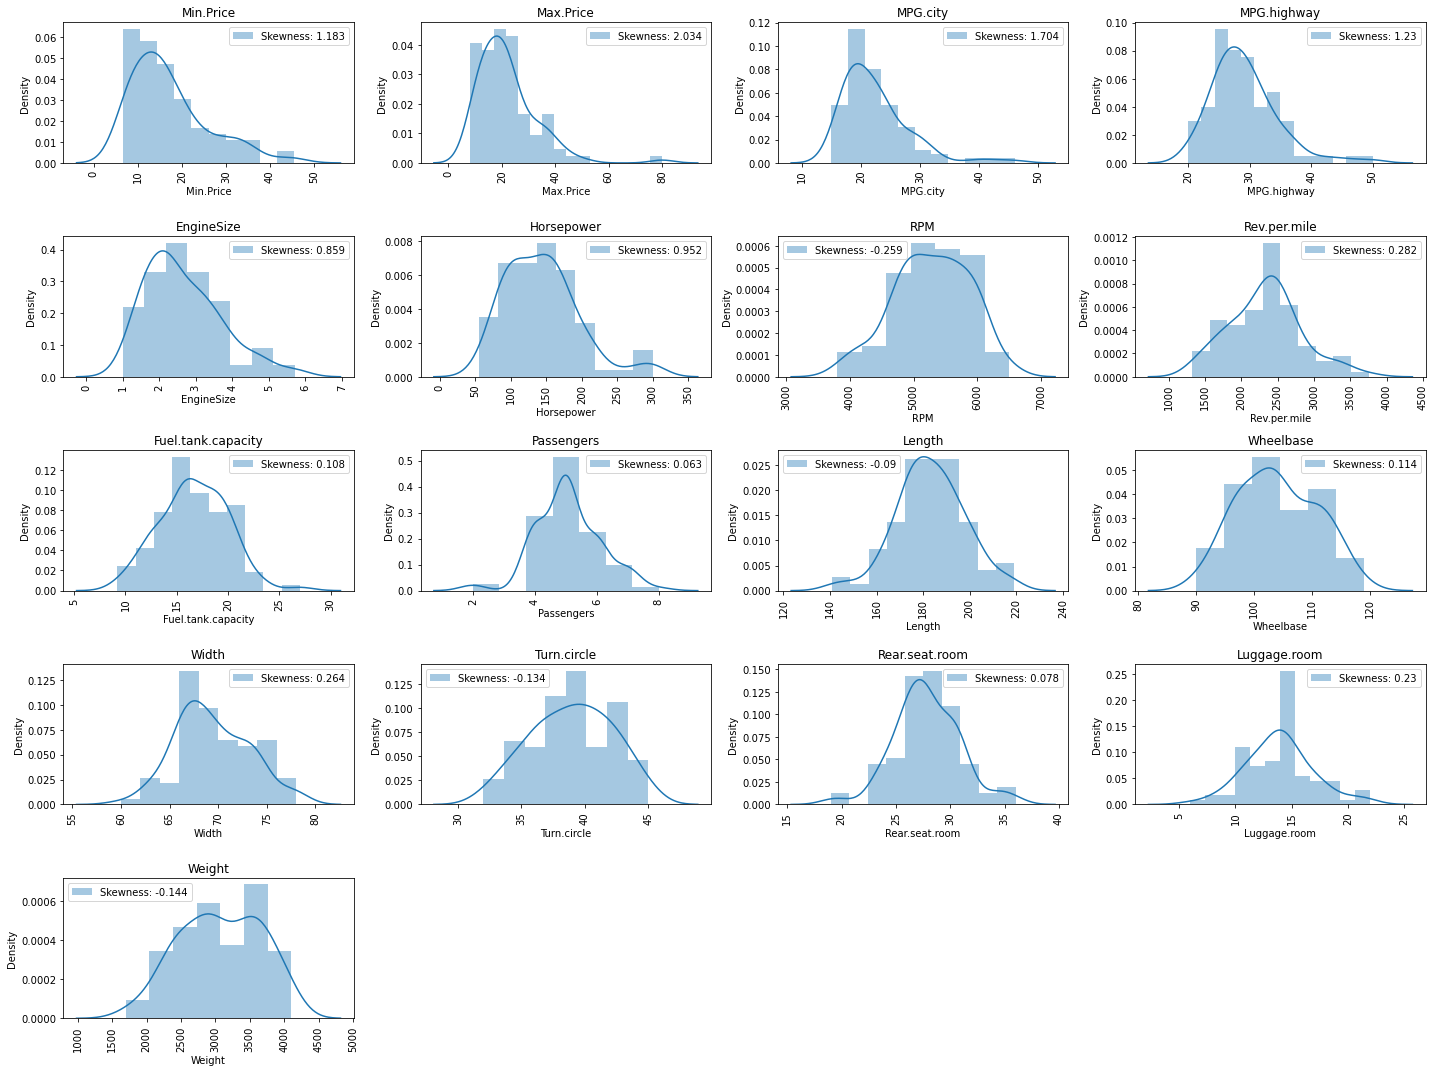

In [169]:
plt.rcParams['figure.figsize']=[20,15]
row=5
col=4
itr=1
for k in num2.columns:
    plt.subplot(row,col,itr)
    sns.distplot(df[k],label='Skewness:'+' '+str(round(df[k].skew(),3)))
    plt.legend()
    plt.title(k)
    itr+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [166]:
#['Model','Make'] have lot of values.
cat2=cat1.drop(['Model','Make'],axis=1)

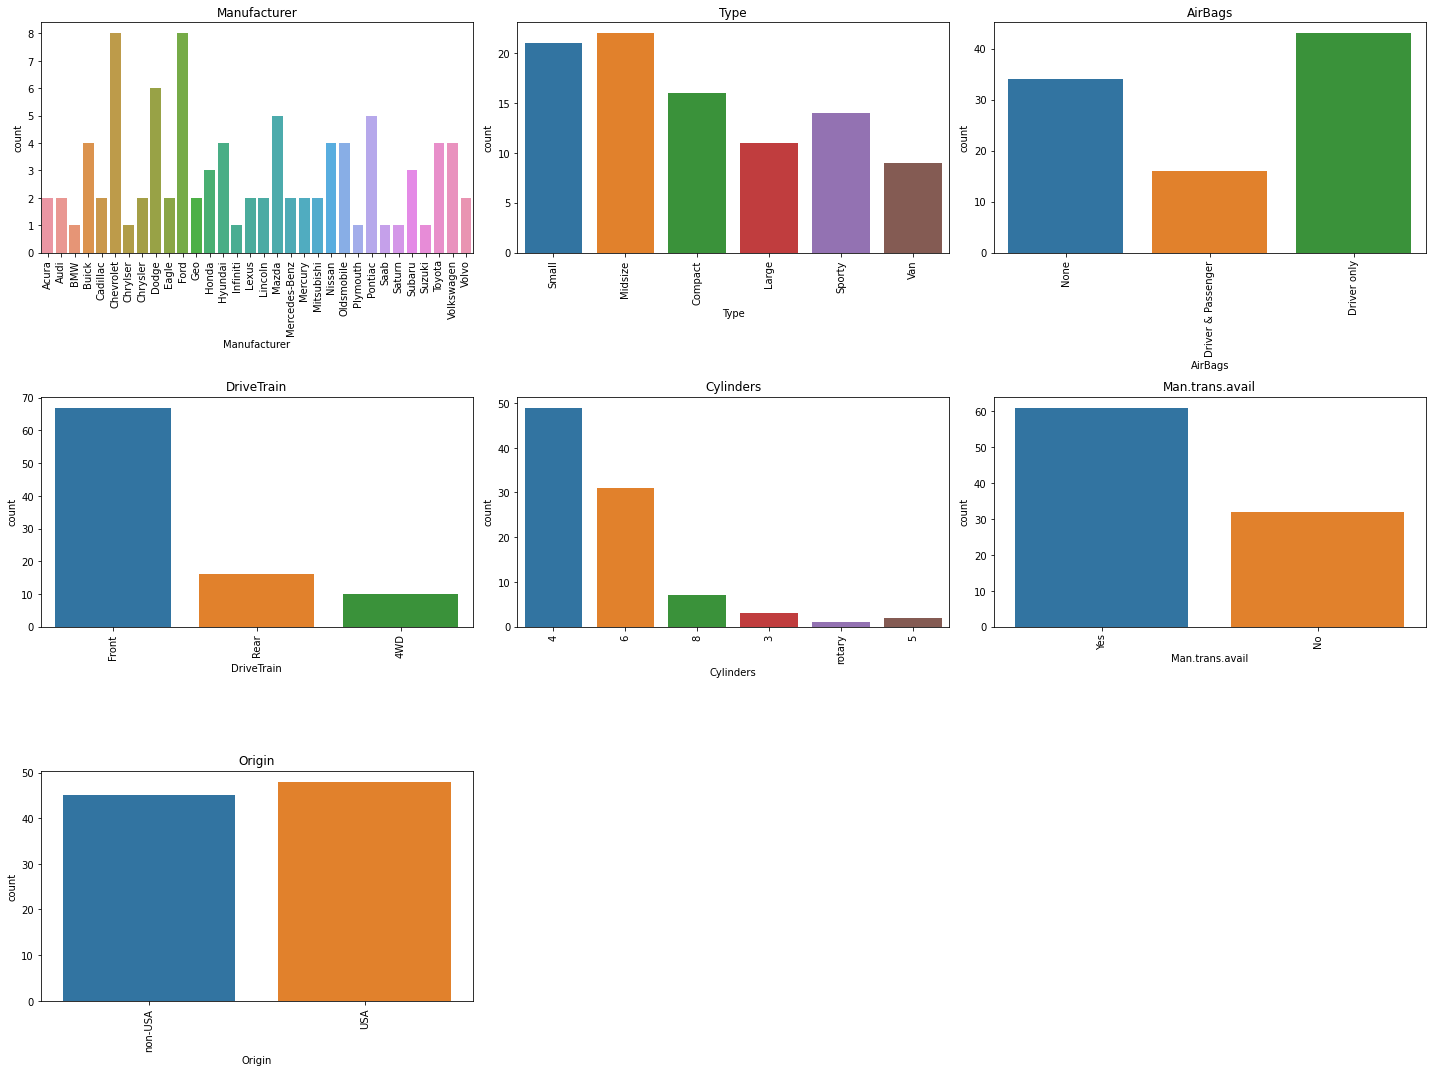

In [167]:
plt.rcParams['figure.figsize']=[20,15]
row=3
col=3
itr=1
for k in cat2.columns:
    plt.subplot(row,col,itr)
    sns.countplot(df[k])
    plt.title(k)
    itr+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


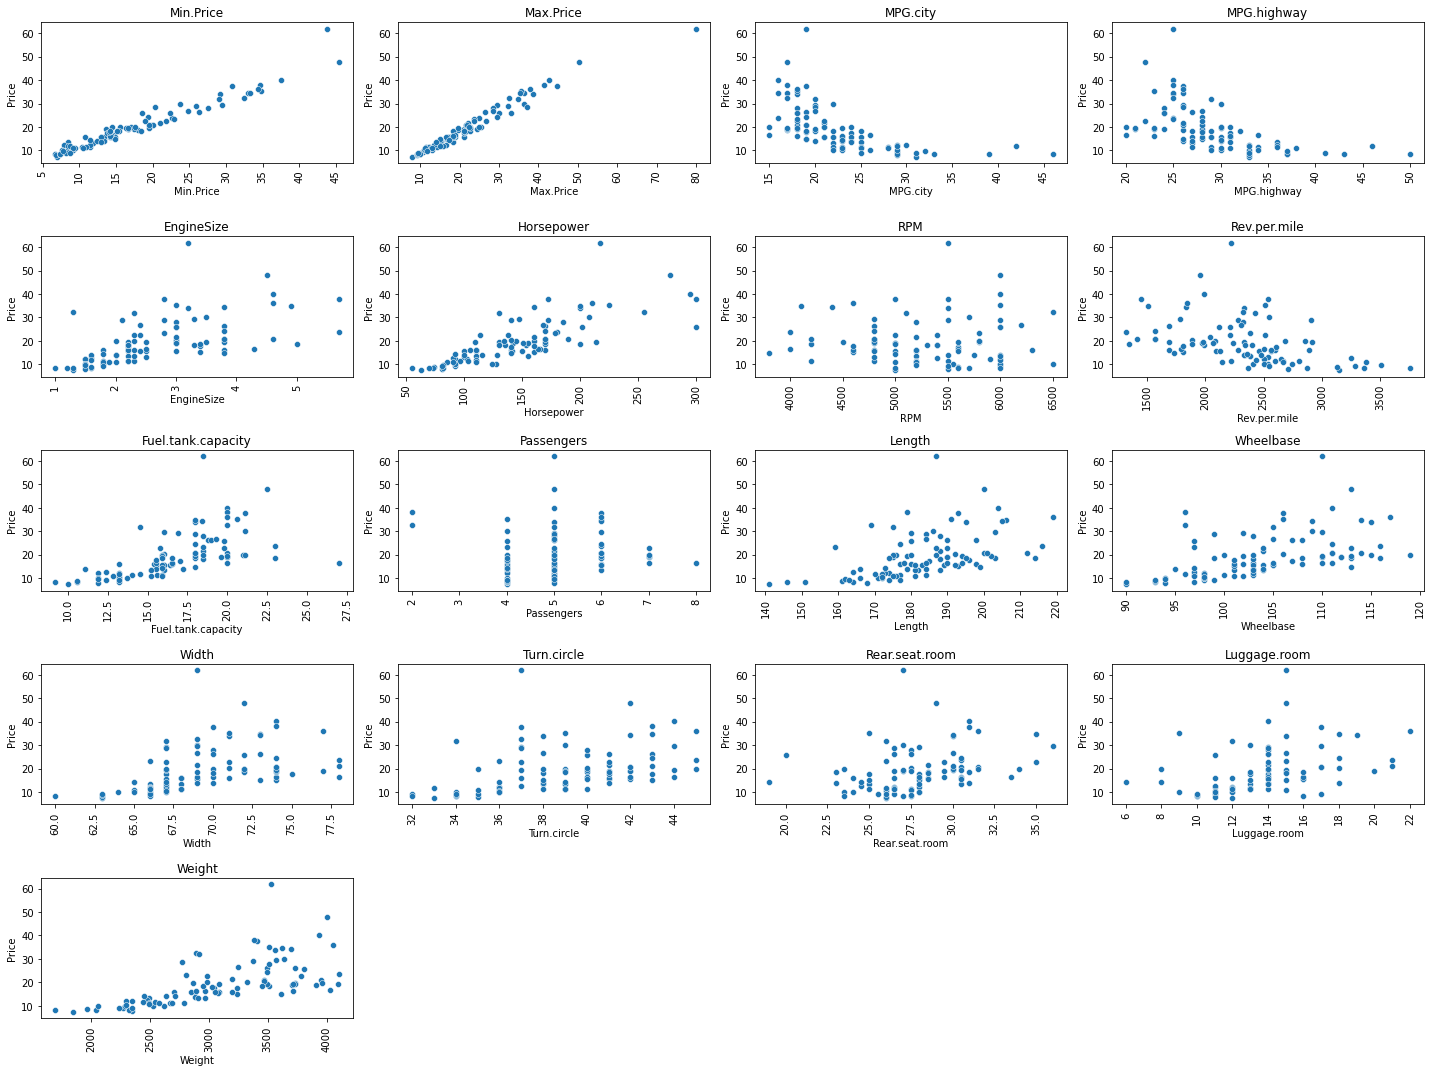

In [171]:
plt.rcParams['figure.figsize']=[20,15]
row=5
col=4
itr=1
for k in num2.columns:
    plt.subplot(row,col,itr)
    sns.scatterplot(x=df[k],y=num1['Price'])
    plt.title(k)
    itr+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


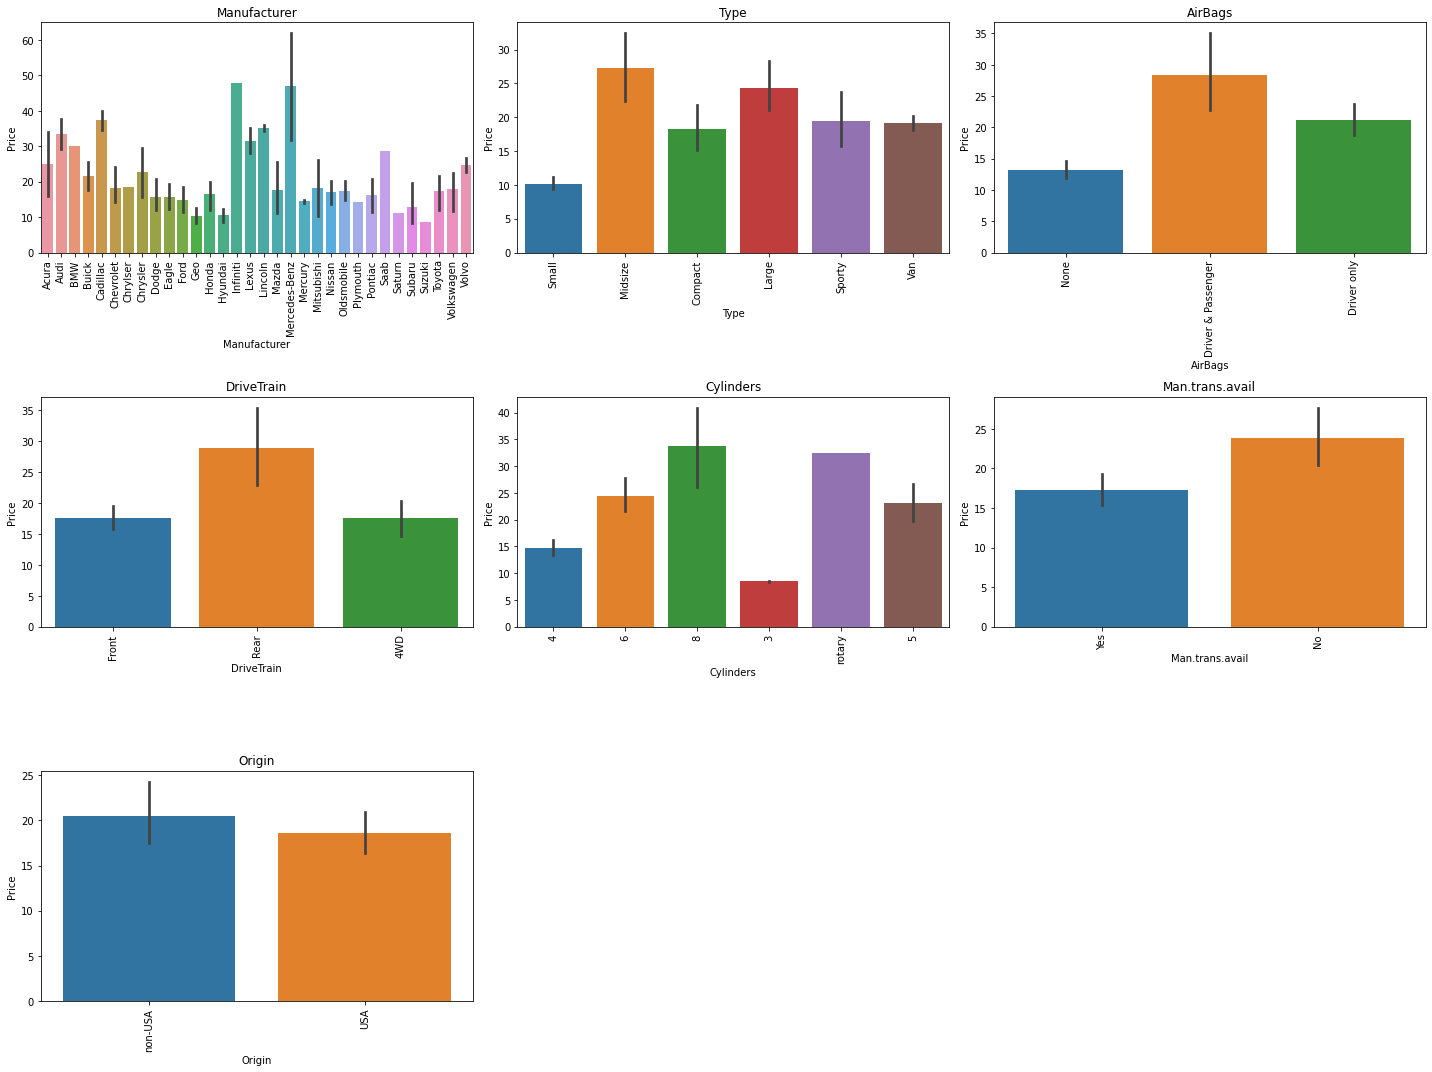

In [172]:
plt.rcParams['figure.figsize']=[20,15]
row=3
col=3
itr=1
for k in cat2.columns:
    plt.subplot(row,col,itr)
    sns.barplot(x=df[k],y=num1['Price'])
    plt.title(k)
    itr+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:>

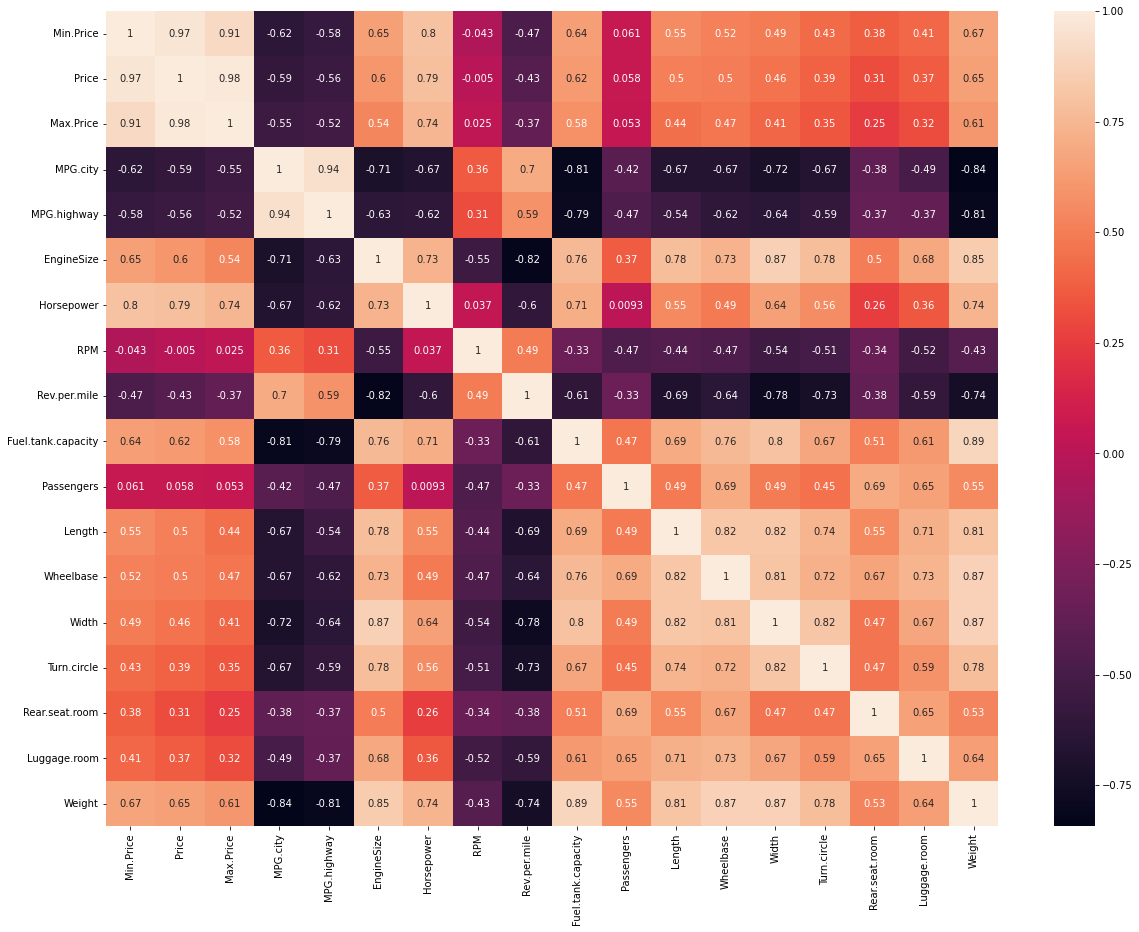

In [173]:
sns.heatmap(df.corr(),annot=True)

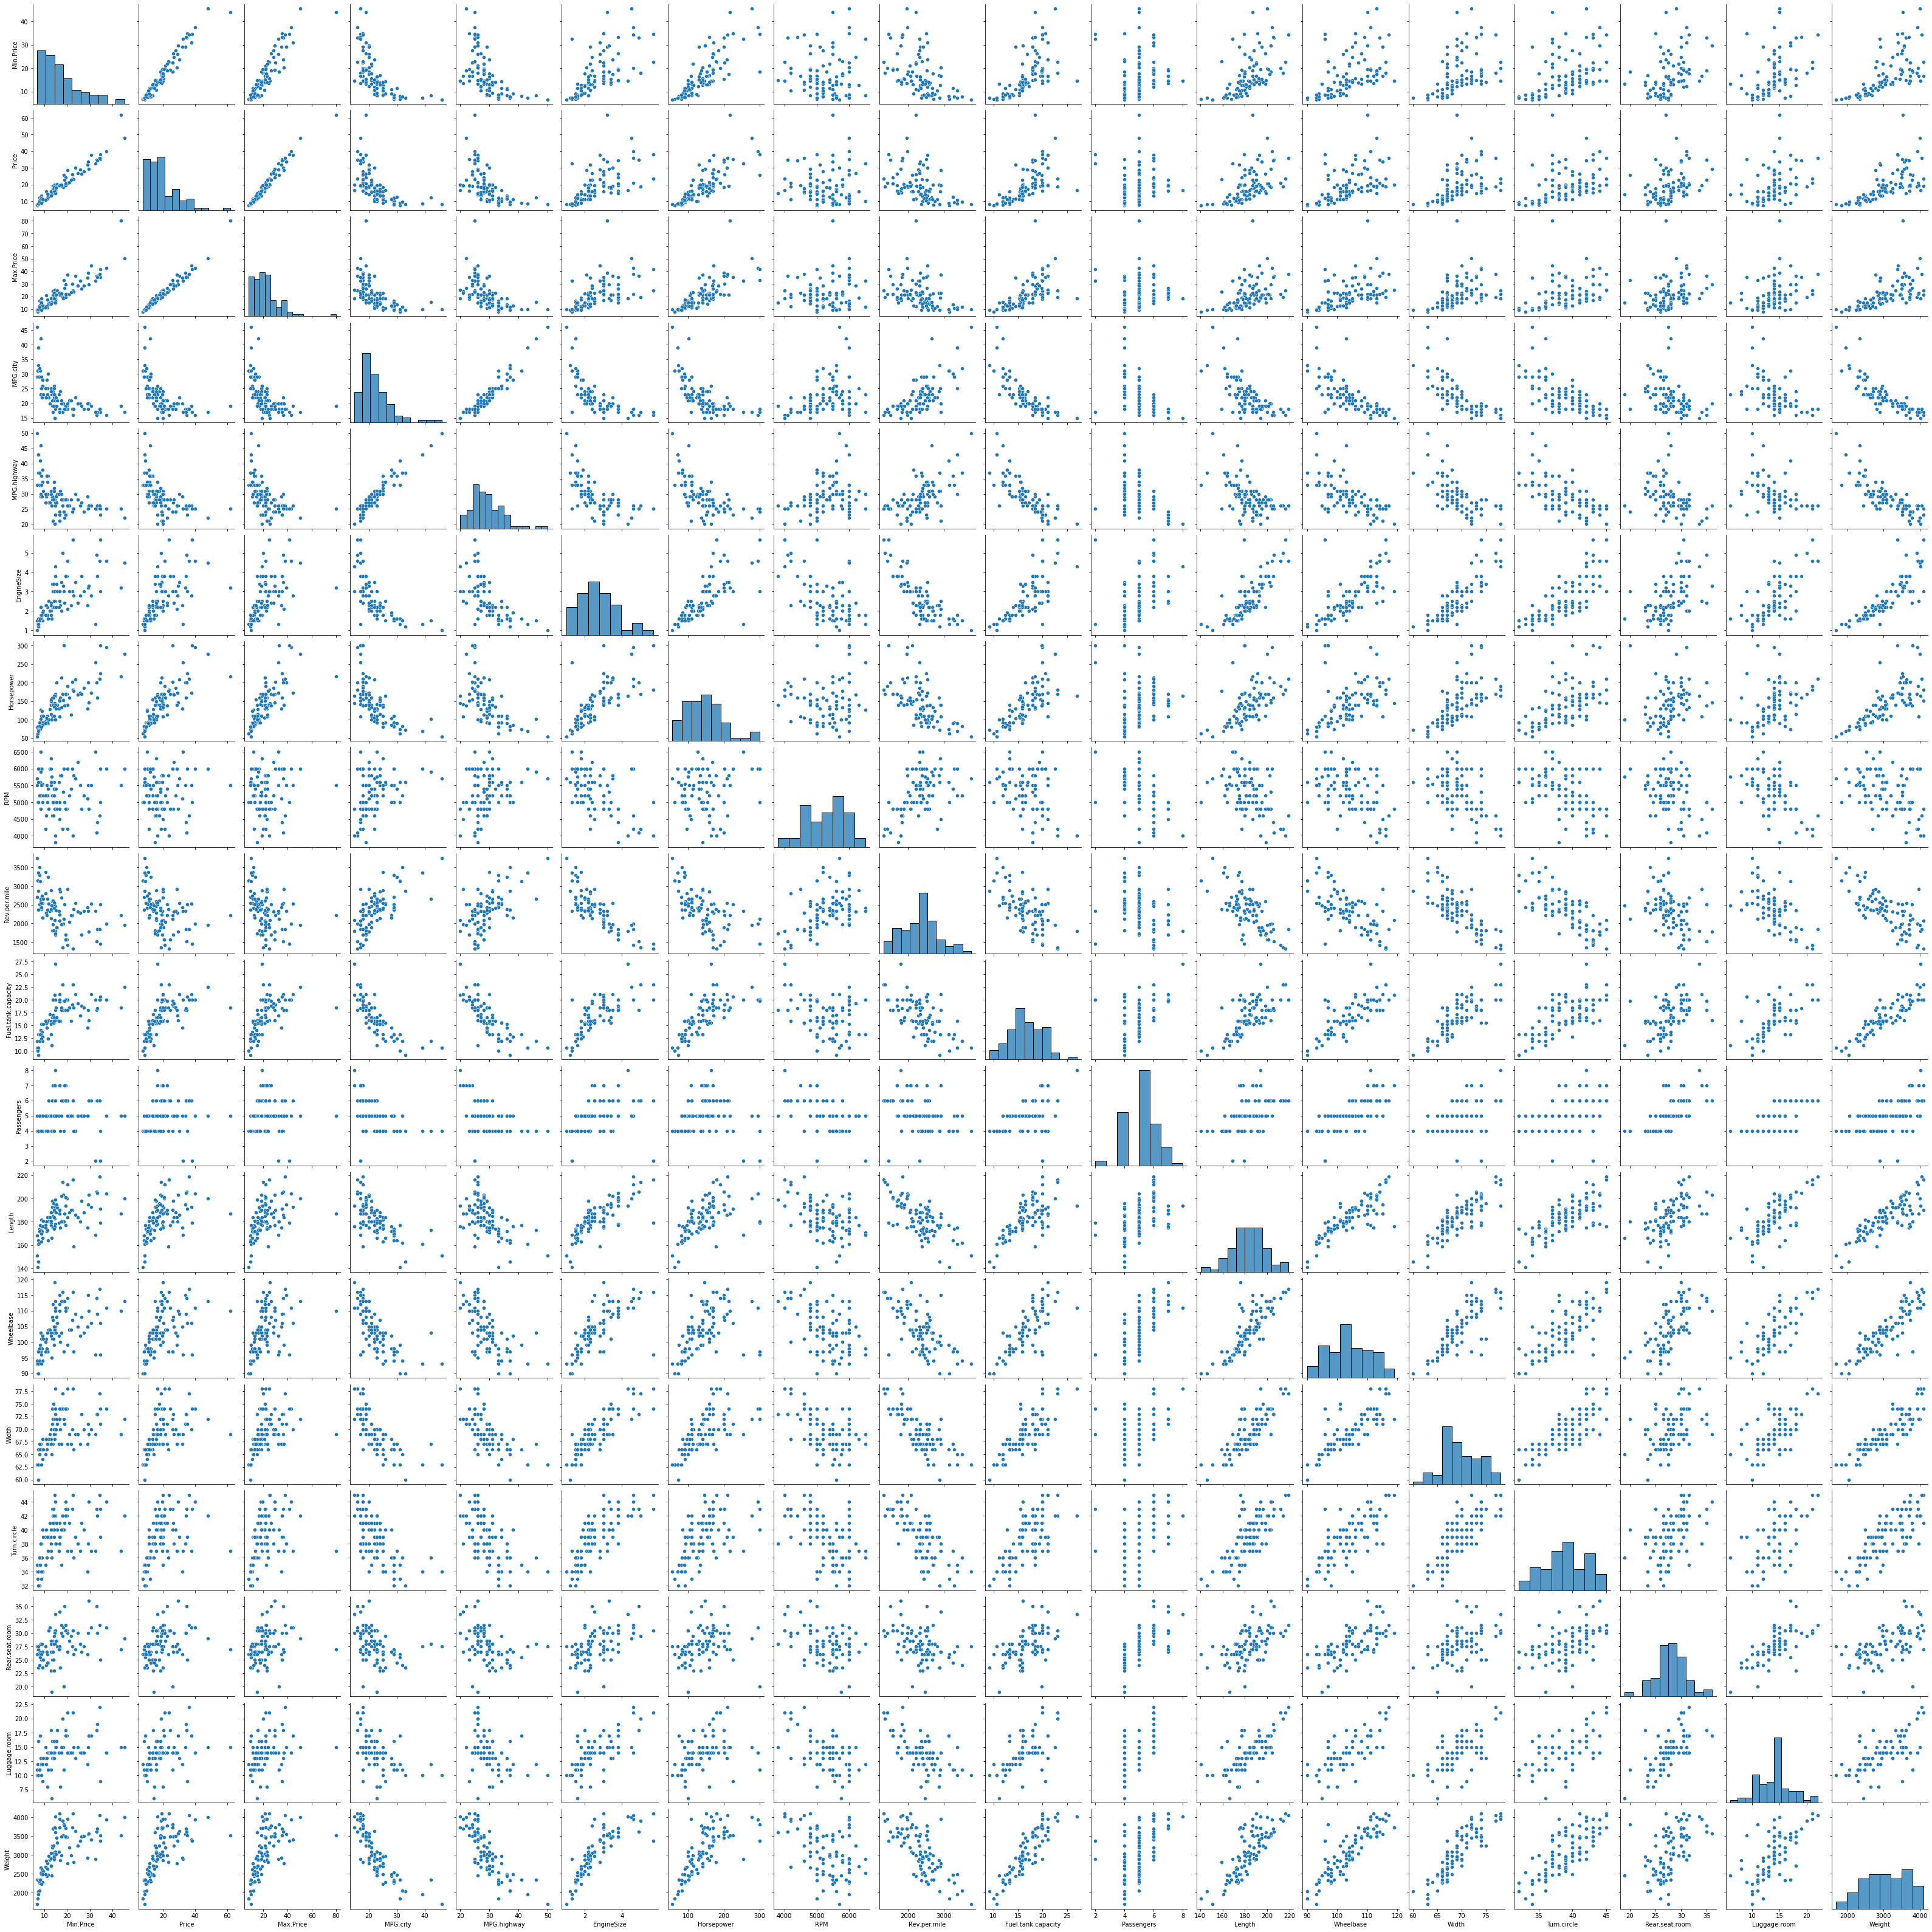

In [175]:
sns.pairplot(df)

We can see linear relation between the variables so we will go with linear models.

# Null Values

In [36]:
df.isna().sum()

Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [37]:
df[df['Rear.seat.room'].isna()]

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,Rear,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7


In [38]:
df['Rear.seat.room'].fillna(0,inplace=True)
df['Luggage.room'].fillna(0,inplace=True)

In [39]:
df.isna().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# Removing Insignificiant features by seeing problem statement.

In [40]:
df['Passengers']=df['Passengers'].astype('object')

In [41]:
df1=df.drop(['Manufacturer','Model','Min.Price','Max.Price','Price','Make'],axis=1)
df1.head()

,Type,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin
1,Small,25,31,None,Front,4,1.8,140,6300,2890,...,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA
2,Midsize,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,...,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA
3,Compact,20,26,Driver only,Front,6,2.8,172,5500,2280,...,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA
4,Midsize,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,...,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA
5,Midsize,22,30,Driver only,Rear,4,3.5,208,5700,2545,...,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA


In [179]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
iqr=q3-q1
up_lim=q3+3*iqr
lo_lim=q1-3*iqr
df1[((df1>up_lim)|(df1<lo_lim)).any(axis=1)].shape

(3, 21)

**I am going with 3 * iqr which is outer fence and also it is industry demand,I find 3 records as outliers but they seems to be relievent for me in further analysis.**

In [47]:
num=df1.select_dtypes(include=np.number)
cat=df1.select_dtypes(include='object')


In [48]:
cat

,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Passengers,Origin
1,Small,None,Front,4,Yes,5,non-USA
2,Midsize,Driver & Passenger,Front,6,Yes,5,non-USA
3,Compact,Driver only,Front,6,Yes,5,non-USA
4,Midsize,Driver & Passenger,Front,6,Yes,6,non-USA
5,Midsize,Driver only,Rear,4,Yes,4,non-USA
...,...,...,...,...,...,...,...
89,Van,None,Front,5,Yes,7,non-USA
90,Compact,None,Front,4,Yes,5,non-USA
91,Sporty,None,Front,6,Yes,4,non-USA
92,Compact,Driver only,Rear,4,Yes,5,non-USA


In [49]:
dummy_var=pd.get_dummies(cat,drop_first=True)

In [50]:
dummy_var

,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van,AirBags_Driver only,AirBags_None,DriveTrain_Front,DriveTrain_Rear,Cylinders_4,...,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,0,0,1,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
5,0,1,0,0,0,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
90,0,0,0,0,0,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,1
91,0,0,0,1,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,0,1
92,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [51]:
num

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
1,25,31,1.8,140,6300,2890,13.2,177,102,68,37,26.5,11.0,2705
2,18,25,3.2,200,5500,2335,18.0,195,115,71,38,30.0,15.0,3560
3,20,26,2.8,172,5500,2280,16.9,180,102,67,37,28.0,14.0,3375
4,19,26,2.8,172,5500,2535,21.1,193,106,70,37,31.0,17.0,3405
5,22,30,3.5,208,5700,2545,21.1,186,109,69,39,27.0,13.0,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,17,21,2.5,109,4500,2915,21.1,187,115,72,38,34.0,0.0,3960
90,21,30,2.0,134,5800,2685,18.5,180,103,67,35,31.5,14.0,2985
91,18,25,2.8,178,5800,2385,18.5,159,97,66,36,26.0,15.0,2810
92,21,28,2.3,114,5400,2215,15.8,190,104,67,37,29.5,14.0,2985


In [56]:
df_new=pd.concat([num,dummy_var],axis=1)

In [57]:
df_new.head()

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,...,Cylinders_6,Cylinders_8,Cylinders_rotary,Man.trans.avail_Yes,Passengers_4,Passengers_5,Passengers_6,Passengers_7,Passengers_8,Origin_non-USA
1,25,31,1.8,140,6300,2890,13.2,177,102,68,...,0,0,0,1,0,1,0,0,0,1
2,18,25,3.2,200,5500,2335,18.0,195,115,71,...,1,0,0,1,0,1,0,0,0,1
3,20,26,2.8,172,5500,2280,16.9,180,102,67,...,1,0,0,1,0,1,0,0,0,1
4,19,26,2.8,172,5500,2535,21.1,193,106,70,...,1,0,0,1,0,0,1,0,0,1
5,22,30,3.5,208,5700,2545,21.1,186,109,69,...,0,0,0,1,1,0,0,0,0,1


In [67]:
from statsmodels.api import add_constant
x=df_new
y=df['Price']
xc=sm.add_constant(x)

In [68]:
x.shape,y.shape


((93, 35), (93,))

In [69]:
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     10.06
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.77e-14
Time:                        14:47:59   Log-Likelihood:                -252.59
No. Observations:                  93   AIC:                             575.2
Df Residuals:                      58   BIC:                             663.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 123.8531     35.647      3.474      0.001      52.498     195.208
MPG.city               -0.3244      0.432     -0.750      0.456      -1.190       0.541
MPG.highway             0.1691      0.398      0.425      0.672      -0.627       0.965
EngineSize             -1.6774      2.828     -0.593      0.555      -7.337       3.983
Horsepower              0.1388      0.045      3.088      0.003       0.049       0.229
RPM                    -0.0026      0.002     -1.169      0.247      -0.007       0.002
Rev.per.mile            0.0017      0.002      0.771      0.444      -0.003       0.006
Fuel.tank.capacity      0.4672      0.540      0.865      0.391      -0.614       1.549
Length                  0.0485      0.110      0.443      0.660      -0.171       0.268
Wheelbase               0.3850      0.274      1.407      0.165      -0.163       0.933
Width                  -1.9087      0.544     -3.511      0.001      -2.997      -0.820
Turn.circle            -0.6224      0.365     -1.703      0.094      -1.354       0.109
Rear.seat.room          0.3343      0.359      0.932      0.355      -0.384       1.053
Luggage.room            0.2737      0.339      0.808      0.423      -0.405       0.952
Weight                 -0.0013      0.006     -0.237      0.813      -0.013       0.010
Type_Large              1.5368      4.227      0.364      0.718      -6.925       9.999
Type_Midsize            3.9322      2.457      1.601      0.115      -0.986       8.850
Type_Small              1.1903      2.657      0.448      0.656      -4.129       6.509
Type_Sporty             6.5059      3.371      1.930      0.059      -0.242      13.254
Type_Van               -2.4458     10.164     -0.241      0.811     -22.791      17.899
AirBags_Driver only    -3.7364      1.897     -1.970      0.054      -7.533       0.060
AirBags_None           -8.3008      2.181     -3.806      0.000     -12.666      -3.936
DriveTrain_Front        2.2805      2.297      0.993      0.325      -2.318       6.879
DriveTrain_Rear         7.2573      2.915      2.490      0.016       1.423      13.092
Cylinders_4            -2.1621      4.446     -0.486      0.629     -11.061       6.737
Cylinders_5            -3.5966      6.722     -0.535      0.595     -17.052       9.859
Cylinders_6             0.8184      5.614      0.146      0.885     -10.419      12.056
Cylinders_8             3.4500      6.832      0.505      0.616     -10.226      17.126
Cylinders_rotary      -15.0831     12.735     -1.184      0.241     -40.576      10.410
Man.trans.avail_Yes    -1.9656      2.167     -0.907      0.368      -6.303       2.372
Passengers_4          -18.5217     10.853     -1.707      0.093     -40.246       3.203
Passengers_5          -15.3971     11.327     -1.359      0.179     -38.070       7.276
Pas

In [70]:
model.pvalues

const                  0.000975
MPG.city               0.456208
MPG.highway            0.672406
EngineSize             0.555333
Horsepower             0.003090
RPM                    0.247042
Rev.per.mile           0.443602
Fuel.tank.capacity     0.390792
Length                 0.659612
Wheelbase              0.164665
Width                  0.000872
Turn.circle            0.093906
Rear.seat.room         0.355425
Luggage.room           0.422625
Weight                 0.813446
Type_Large             0.717532
Type_Midsize           0.114914
Type_Small             0.655873
Type_Sporty            0.058502
Type_Van               0.810684
AirBags_Driver only    0.053615
AirBags_None           0.000342
DriveTrain_Front       0.324955
DriveTrain_Rear        0.015668
Cylinders_4            0.628581
Cylinders_5            0.594660
Cylinders_6            0.884602
Cylinders_8            0.615501
Cylinders_rotary       0.241107
Man.trans.avail_Yes    0.368069
Passengers_4           0.093243
Passenge

In [71]:
pval_series=pd.Series(model.pvalues[1:],index=x.columns)

In [72]:
pval_series

MPG.city               0.456208
MPG.highway            0.672406
EngineSize             0.555333
Horsepower             0.003090
RPM                    0.247042
Rev.per.mile           0.443602
Fuel.tank.capacity     0.390792
Length                 0.659612
Wheelbase              0.164665
Width                  0.000872
Turn.circle            0.093906
Rear.seat.room         0.355425
Luggage.room           0.422625
Weight                 0.813446
Type_Large             0.717532
Type_Midsize           0.114914
Type_Small             0.655873
Type_Sporty            0.058502
Type_Van               0.810684
AirBags_Driver only    0.053615
AirBags_None           0.000342
DriveTrain_Front       0.324955
DriveTrain_Rear        0.015668
Cylinders_4            0.628581
Cylinders_5            0.594660
Cylinders_6            0.884602
Cylinders_8            0.615501
Cylinders_rotary       0.241107
Man.trans.avail_Yes    0.368069
Passengers_4           0.093243
Passengers_5           0.179295
Passenge

In [ ]:
# RFE

In [81]:
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x = x[cols]
    xc = sm.add_constant(x)
    model = sm.OLS(y,xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Horsepower', 'Width', 'Rear.seat.room', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear', 'Passengers_4', 'Passengers_5', 'Passengers_6']


In [75]:
# pval_series[pval_series.values<0.05]

In [82]:
df_selected=x[selected_features]
df_selected

,Horsepower,Width,Rear.seat.room,Type_Midsize,AirBags_Driver only,AirBags_None,DriveTrain_Rear,Passengers_4,Passengers_5,Passengers_6
1,140,68,26.5,0,0,1,0,0,1,0
2,200,71,30.0,1,0,0,0,0,1,0
3,172,67,28.0,0,1,0,0,0,1,0
4,172,70,31.0,1,0,0,0,0,0,1
5,208,69,27.0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
89,109,72,34.0,0,0,1,0,0,0,0
90,134,67,31.5,0,0,1,0,0,1,0
91,178,66,26.0,0,0,1,0,1,0,0
92,114,67,29.5,0,1,0,1,0,1,0


In [99]:
lr=LinearRegression()
kf=KFold(n_splits=3,shuffle=True,random_state=0)
rmse=cross_val_score(lr,df_selected,y,cv=kf,scoring='neg_root_mean_squared_error')
bias_error=np.mean(np.abs(rmse))
variance_error=np.std(np.abs(rmse),ddof=1)
print('Bias Error:',bias_error)
print('Variance Error:',variance_error)

Bias Error: 5.2497202742624856
Variance Error: 1.0727127462531347


# Feature Selection 

In [106]:
feature_selection=sfs(estimator=lr,k_features=10,forward=True,scoring='neg_mean_squared_error')
sfs_forward=feature_selection.fit(x,y)
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

Features selelected using forward selection are: 
('Horsepower', 'Width', 'Rear.seat.room', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear', 'Passengers_4', 'Passengers_5', 'Passengers_6')


In [112]:
feature_selection=sfs(estimator=lr,k_features='best',forward=True,scoring='neg_mean_squared_error')
sfs_forward=feature_selection.fit(x,y)
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

Features selelected using forward selection are: 
('Horsepower', 'Width', 'Rear.seat.room', 'Type_Midsize', 'AirBags_Driver only', 'AirBags_None', 'DriveTrain_Rear', 'Passengers_4', 'Passengers_5', 'Passengers_6')


In [115]:
Rec_fe_elm=RFE(estimator=lr,n_features_to_select=10)
recursive=Rec_fe_elm.fit(x,y)
print('Features selelected using forward selection are: ')
print(recursive.feature_names_in_)


Features selelected using forward selection are: 
['Horsepower' 'Width' 'Rear.seat.room' 'Type_Midsize'
 'AirBags_Driver only' 'AirBags_None' 'DriveTrain_Rear' 'Passengers_4'
 'Passengers_5' 'Passengers_6']


In [117]:
x_after_fs=pd.DataFrame(x[recursive.feature_names_in_])
x_after_fs

,Horsepower,Width,Rear.seat.room,Type_Midsize,AirBags_Driver only,AirBags_None,DriveTrain_Rear,Passengers_4,Passengers_5,Passengers_6
1,140,68,26.5,0,0,1,0,0,1,0
2,200,71,30.0,1,0,0,0,0,1,0
3,172,67,28.0,0,1,0,0,0,1,0
4,172,70,31.0,1,0,0,0,0,0,1
5,208,69,27.0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
89,109,72,34.0,0,0,1,0,0,0,0
90,134,67,31.5,0,0,1,0,0,1,0
91,178,66,26.0,0,0,1,0,1,0,0
92,114,67,29.5,0,1,0,1,0,1,0


 As we have seen using ols,sfs,rfe that 10 variables are giving us significance in our model.

# We will find Minimum,Maximum,Avarage Accuracy of our data Using cross Validation.

In [118]:
lr=LinearRegression()
kf=KFold(n_splits=5,shuffle=True,random_state=10)
model_scores=cross_val_score(estimator=lr,X=x_after_fs,y=y,cv=kf,scoring='r2')

In [119]:
model_scores

array([0.68148449, 0.69206189, 0.85999073, 0.6968265 , 0.69978725])

In [125]:
print('Max r2 score:',round(max(model_scores),3))
print('Min r2 score:',round(min(model_scores),3))
print('Avg r2 score:',round(np.mean(model_scores),3))



Max r2 score: 0.86
Min r2 score: 0.681
Avg r2 score: 0.726
